<h1 style="color:#ffc0cb;font-size:70px;font-family:Georgia;text-align:center;"><strong>Book Recommender System</strong></h1>

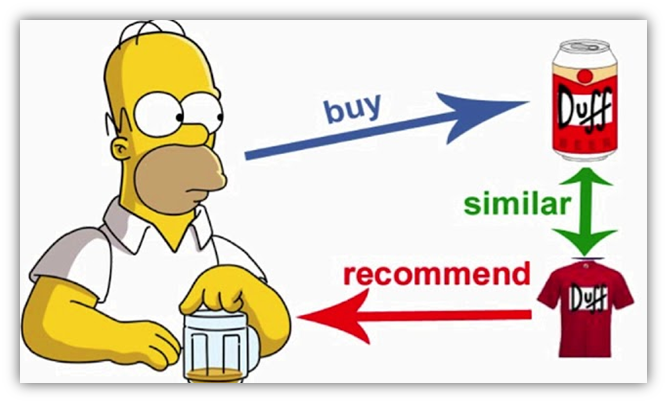

<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 📜 Table of Content</strong></h1>

### 1. [Data Preparation](#1)

1.1 [Importing Necessary Libraries and datasets](#1.1)

1.2 [Data Retrieving](#1.2)

1.3 [Data information](#1.3)

<br>

### 2. [Data Cleaning](#2)

2.1 [About This Dataset](#2.1)

2.2 [Data Processing](#2.2)

> - 2.2.1 [Drop Column](#2.2.1) 
> - 2.2.2 [Convert length of stay to 0 and 1](#2.2.2)
> - 2.2.2 [Convert Unknown](#2.2.2)


2.3 [Check missing values](#2.3)

2.4 [Data type](#2.4)

2.5 [Upper Case the content](#2.5)

2.6 [Extra-whitespaces](#2.6)

2.7 [Descriptive statistics for Central Tendency](#2.7)

2.8 [Detect Outlier](#2.8)

2.9 [Save The Intermediate Data](#2.9)

<br>

### 3. [Data Exploration (EDA)](#3)

3.1 [Overall look on target variable](#3.1)

> - 3.1.1 [Distribution of Length Of Stay](#3.1.1) 
> - 3.1.2 [Distribution of Length Of Stay](#3.1.2) 

3.2 [Frequency of each corresponiding Target variable type](#3.2)

> - 3.2.1 [Medical Cost of both group stay more vs less than 3 days in Hospital](#3.2.1) 
> - 3.2.2 [Length of stay of each serverity of illness group](#3.2.2) 
> - 3.2.3 [Patient Gender Distribution - Stay less vs more than 3 days](#3.2.3) 
> - 3.2.4 [APR Severity Of Illness Code Distribution - Stay less vs more than 3 days](#3.2.4) 
> - 3.2.5 [Race Distribution - Stay less vs more than 3 days](#3.2.5) 
> - 3.2.6 [Severity of illness of each reaces](#3.2.6) 
> - 3.2.7 [Medical Cost of each Race in both group stay more vs less than 3 days in Hospital](#3.2.7) 
> - 3.2.8 [Medical Cost of each Severity of illness in both group stay more vs less than 3 days in Hospital](#3.2.8) 
> - 3.2.9 [Average hospitalization Cost Distribution Stay more vs less than 3 days](#3.2.9) 
> - 3.2.10 [Birth Weight Distribution - Stay more vs less than 3 days](#3.2.10) 
> - 3.2.11 [Average Charges In County Distribution - Stay more vs less than 3 days](#3.2.11) 
> - 3.2.12 [Average Cost In Facility Distribution - Stay more vs less than 3 days](#3.2.12) 
> - 3.2.13 [Average Charges In Facility Distribution - Stay more vs less than 3 days](#3.2.13) 
> - 3.2.14 [Factorplot of Average Charges In Facility Length Of Stay](#3.2.14) 


3.3 [Summary](#3.3)

<br>

### 4. [Statistic Overview](#4)

4.1 [Descriptive statistics for Variability](#4.1)

4.2 [Correlation Matrix and Heatmap](#4.2)

> - 4.2.1 [Correlation Matrix](#4.2.1)
> - 4.2.2 [Heat map](#4.2.2)

4.3 [Statistical Test for Correlation](#4.3)

<br>

### 5. [Feature Engineering](#5) 

5.1 [Encoding](#5.1)

5.2 [Separating dependent and independent variables](#5.2)

5.3 [Splitting the training data](#5.3)

5.4 [Feature Scaling](#5.4)

<br>

### 6. [Model Building](#6) 

5.1 [Logistic Regression](#5.1)

5.1 [Feature Scaling](#5.2)

5.1 [Feature Scaling](#5.3)

5.1 [Feature Scaling](#5.4)


<br>

### 7. [Conculsions](#7)

<br>

### 8. [References](#8)

<br>

### 9. [Appendix](#9)

<hr>

<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> ✍️ 1. Data Preparation</strong></h1>

<a id="1.1"></a>
# ️🎯 1.1 Introduction
****

<p style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black"> 
    Thank to the growth of not only technology but also networking, the e-commercial activities has become more common so does ebook platform. Therefore, the recommender system works effectively in the ebook platform particularly, and the internet in general. There are two main algorithms for the recommender system using machine learning which are Content-based and Collaborative Filtering, nevertheless, their most considerable disadvantages are not capable of generating. Since then, I will also make recommendation base on the popularity of the books.
</p>

## 📣 What will you get after this notebook?

<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li> A Basic Recommender System using Content-based Collaborative Filtering and Popularity </li>
    <li> Factors influence on the recommendation </li>
</ul>

<a id="1.2"></a>
# ️🎯 1.2 Target question for insights
****
<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>Which <span style="color:#122ecc;">Book-Title </span> get the highest rating get Sepsis?</li>
</ul>

<a id="1.3"></a>
# ✴️ 1.3 Importing Necessary Libraries and datasets
****

In [1]:
# Install a conda package in the current Jupyter kernel
import sys
!{sys.executable} -m pip -q install missingno
!{sys.executable} -m pip -q install scikit-learn
!{sys.executable} -m pip -q install xgboost
!{sys.executable} -m pip -q install statsmodels
!{sys.executable} -m pip -q install imbalanced-learn
!{sys.executable} -m pip -q install category_encoders
!{sys.executable} -m pip -q install wordcloud
!{sys.executable} -m pip -q install dataprep


# work with data in tabular representation
from datetime import time
import pandas as pd
# round the data in the correlation matrix
import numpy as np
import os


# Modules for data visualization
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from wordcloud import WordCloud, STOPWORDS
from dataprep.clean import validate_country

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix, classification_report

# encoding
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import category_encoders as ce

# import LogisticRegression model in python. 
from sklearn.metrics import mean_absolute_error, accuracy_score

# for saving the pipeline
import joblib

# from Scikit-learn


pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

# Ensure that our plots are shown and embedded within the Jupyter notebook itself. Without this command, sometimes plots may show up in pop-up windows
%matplotlib inline

# overwrite the style of all the matplotlib graphs
sns.set()

# ignore DeprecationWarning Error Messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# check the version of the packages
print("Numpy version: ", np.__version__)
print("Pandas version: ",pd.__version__)
! python --version

Numpy version:  1.22.3
Pandas version:  1.3.4
Python 3.9.7


<a id="1.4"></a>
# 📲 1.4 Data Retrieving
***
In order to load data properly, the data in csv file have to be examined carefully. First of all, all the categories are seperated by the "," and strip the extra-whitespaces at the begin by setting "skipinitialspace = True".

> **User Dataset**

In [3]:
## Importing the datasets
user = pd.read_csv("Data/Book-Users.csv", delimiter=';', skipinitialspace = True, encoding='cp1252')

user.columns = user.columns.str.replace(' ', '') #strip the extra-whitespaces out

print("The shape of the ORGINAL data is (row, column):", str(user.shape))

# drop Unnamed, it is just a number given to identify each house
user.head(3)

The shape of the ORGINAL data is (row, column): (278858, 3)


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


> **Book Dataset**

In [4]:
## Importing the datasets
book = pd.read_csv("Data/Book_List.csv", delimiter=';', skipinitialspace = True, encoding='cp1252', on_bad_lines='skip')

book.columns = book.columns.str.replace(' ', '') #strip the extra-whitespaces out

print("The shape of the ORGINAL data is (row, column):", str(book.shape))

# drop Unnamed, it is just a number given to identify each house
book.head(3)

The shape of the ORGINAL data is (row, column): (271360, 8)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


> **Rating Dataset**

In [5]:
## Importing the datasets
rating = pd.read_csv("Data/Book_Ratings.csv", delimiter=';', skipinitialspace = True, encoding='cp1252', on_bad_lines='skip')

rating.columns = rating.columns.str.replace(' ', '') #strip the extra-whitespaces out

print("The shape of the ORGINAL data is (row, column):", str(rating.shape))

# drop Unnamed, it is just a number given to identify each house
rating.head(3)

The shape of the ORGINAL data is (row, column): (1149780, 3)


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


<a id="1.5"></a>
# 🔈 1.5 Data Information
****
Let's take a look in three dataset.
> **Sample Book Dataset**

In [6]:
print ("The shape of the Book data is (row, column):"+ str(book.shape))
print (book.info())

The shape of the Book data is (row, column):(271360, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None


### ------------> OBSERVATION
***
From this, the information that I gained from the train dataset are the total paitent record is 271360 with some of the missing values

> **Sample User Dataset**

In [7]:
print ("The shape of the User data is (row, column):"+ str(user.shape))
print (user.info())

The shape of the User data is (row, column):(278858, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB
None


### ------------> OBSERVATION
***
From this, the information that I gained from the train dataset are the total paitent record is 271360 with some of the missing values

> **Sample Rating Dataset**

In [8]:
print ("The shape of the Rating data is (row, column):"+ str(rating.shape))
print (rating.info())

The shape of the Rating data is (row, column):(1149780, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB
None


### ------------> OBSERVATION
***
From this, the information that I gained from the train dataset are the total paitent record is 599 with no missing and it has 11 columns.

<a id="2"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 🧹 2. Data Cleaning</strong></h1>

<a id="2.1"></a>
# 🦄 2.1 About This Dataset
***

<p style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">There are 3 dataset: </p>

<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>User dataset (train.csv)</li>
    <li>Rating dataset (test.csv)</li>
    <li>Book dataset (test.csv)</li>
</ul>

<p style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">Now let's go through the features and describe a little: </p>

***
**Categorical:** 
            
- **Ordinal**(just like nominal datatype but can be ordered or ranked)
   > - **Age** (User age) : this could be numerical and ordinal since it can be ordered
   > - **Book-Rating** (Book Rating) : this could be numerical and ordinal since it can be ordered
   
- **Norminal**(just like nominal datatype but can be ordered or ranked)
   > - **Book-Title** (Book Title)
   > - **Book-Author** (Book Title)
   > - **Publisher** (Publisher)
   > - **Image-URL-S** (Image-URL-S)
   > - **Image-URL-M** (Image-URL-M)
   > - **Image-URL-L** (Image-URL-L)
   > - **User-ID** (Image-URL-L)
   > - **Location** (Location)

   
***
**Numeric:**
- **Discrete**
  >  - **Book-Rating** (Book Rating)
  >  - **Year-Of-Publication** (Book Rating)

<a id="2.2"></a>
# ✂️ 2.2 Data Processing
***

<a id="2.2.1"></a>
## ❌ 2.2.1 Drop duplicate
****

> **Sample User Dataset**

In [9]:
print ("The shape of the data set before dropping duplicated:"+ str(user.shape))

user = user.drop_duplicates()

print ("The shape of the data set after dropping duplicated:"+ str(user.shape))

The shape of the data set before dropping duplicated:(278858, 3)
The shape of the data set after dropping duplicated:(278858, 3)


> **Sample Rating Dataset**

In [10]:
print ("The shape of the data set before dropping duplicated:"+ str(rating.shape))

rating = rating.drop_duplicates()

print ("The shape of the data set after dropping duplicated:"+ str(rating.shape))

The shape of the data set before dropping duplicated:(1149780, 3)
The shape of the data set after dropping duplicated:(1149780, 3)


> **Sample Book Dataset**

In [11]:
print ("The shape of the data set before dropping duplicated:"+ str(book.shape))

book = book.drop_duplicates()

print ("The shape of the data set after dropping duplicated:"+ str(book.shape))

The shape of the data set before dropping duplicated:(271360, 8)
The shape of the data set after dropping duplicated:(271360, 8)


<a id="2.2.2"></a>
## 📌 2.2.2 Rename columns
***

> **Sample user Dataset**

In [12]:
user.rename(columns={"User-ID": "User_ID"}, inplace=True)

> **Sample rating Dataset**

In [13]:
rating.rename(columns={"User-ID": "User_ID", "Book-Rating":"Book_Rating"}, inplace=True)

> **Sample book Dataset**

In [14]:
book.rename(columns={"Book-Title": "Book_Title", "Book-Author": "Book_Author",
                     "Year-Of-Publication":"Publication_year", "Image-URL-S":"Image_URL",
                     "Image-URL-M":"Image_URL_M", "Image-URL-L":"Image_URL_L",
                    }, inplace=True)

<a id="2.2.2"></a>
## 📌 2.2.2 Drop columns
***
I do not want to store all images size for all book, so that I just want to keep the `Image_URL_S` column

In [15]:
book = book.drop(columns=['Image_URL_M', 'Image_URL_L'])

<a id="2.3"></a>
# 👀 2.3 Check missing values 
***

<a id="2.3.1"></a>
## 🔎 2.3.1 Detect missing values 
****

> **Sample user Dataset**

Missing values in the user dataframe in descending: 
       Total  Percent
Age  110762    39.72


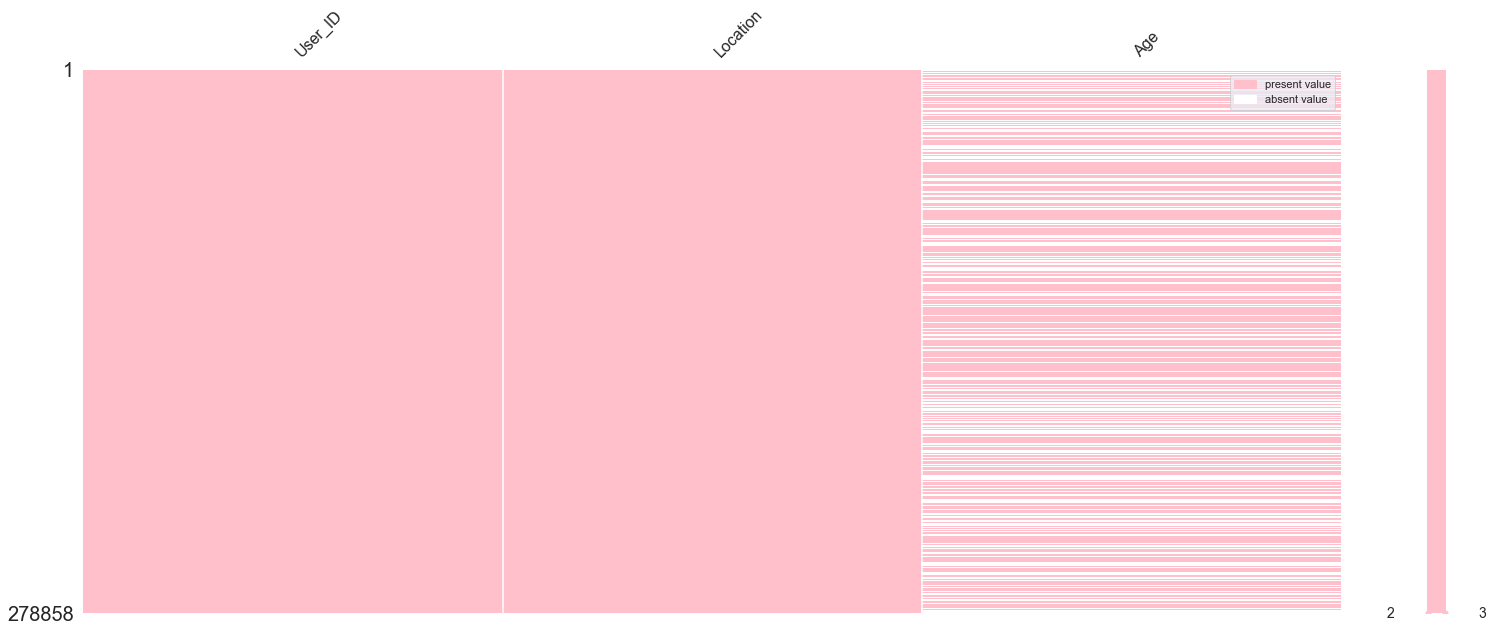

In [16]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2)[
        round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# display missing values in descending
print("Missing values in the user dataframe in descending: \n", missing_percentage(user).sort_values(by='Total', ascending=False))

# visualize where the missing values are located
msno.matrix(user, color=(255 / 255, 192 / 255, 203 / 255))
pink_patch = mpatches.Patch(color='pink', label='present value')
white_patch = mpatches.Patch(color='white', label='absent value')
plt.legend(handles=[pink_patch, white_patch])
plt.show()

### ------------> OBSERVATION
***
The amount of missing values of Age column is considerable, I still want to fill them, since I still want to use both of collaborating filtering and content based.

> **Sample rating Dataset**

Missing values in the rating dataframe in descending: 
 Empty DataFrame
Columns: [Total, Percent]
Index: []


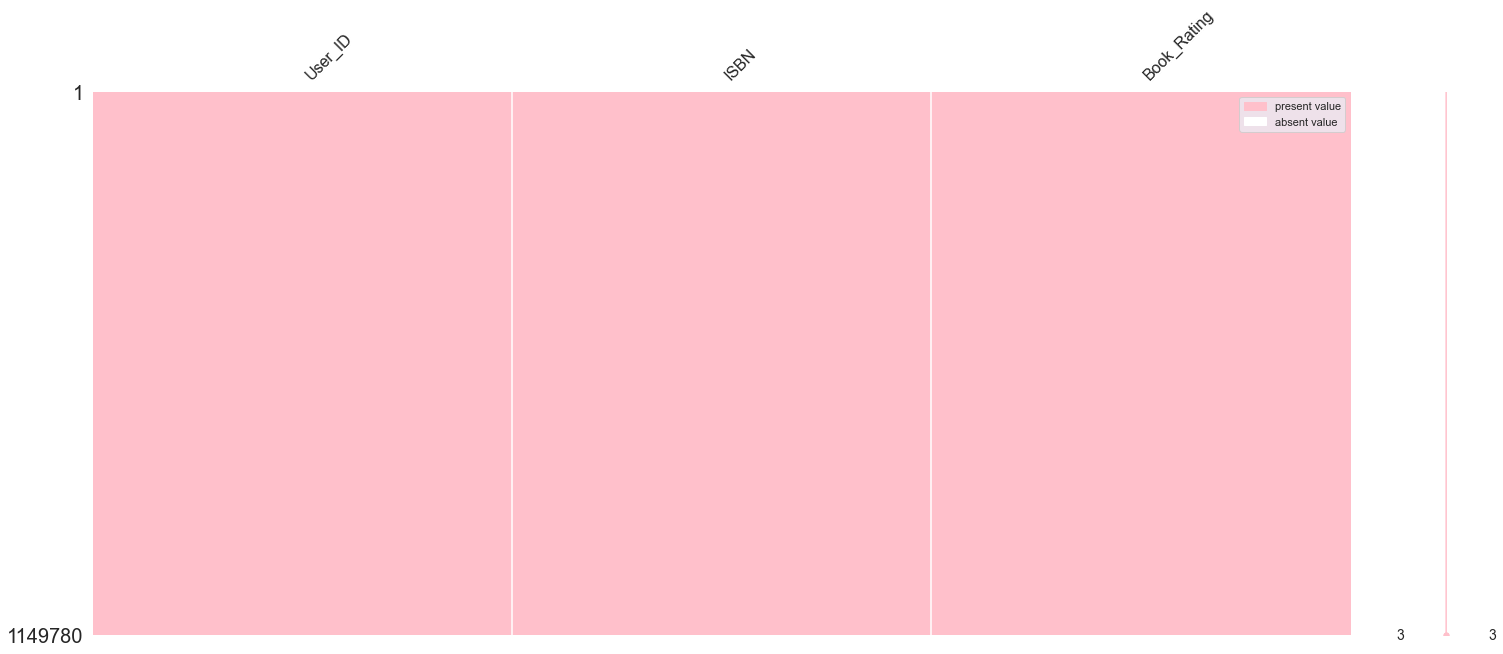

In [17]:
# display missing values in descending
print("Missing values in the rating dataframe in descending: \n", missing_percentage(rating).sort_values(by='Total', ascending=False))

# visualize where the missing values are located
msno.matrix(rating, color=(255 / 255, 192 / 255, 203 / 255))
pink_patch = mpatches.Patch(color='pink', label='present value')
white_patch = mpatches.Patch(color='white', label='absent value')
plt.legend(handles=[pink_patch, white_patch])
plt.show()

### ------------> OBSERVATION
***
There are no missing values.

> **Sample book Dataset**

Missing values in the book dataframe in descending: 
              Total  Percent
Publisher        2      NaN
Book_Author      1      NaN


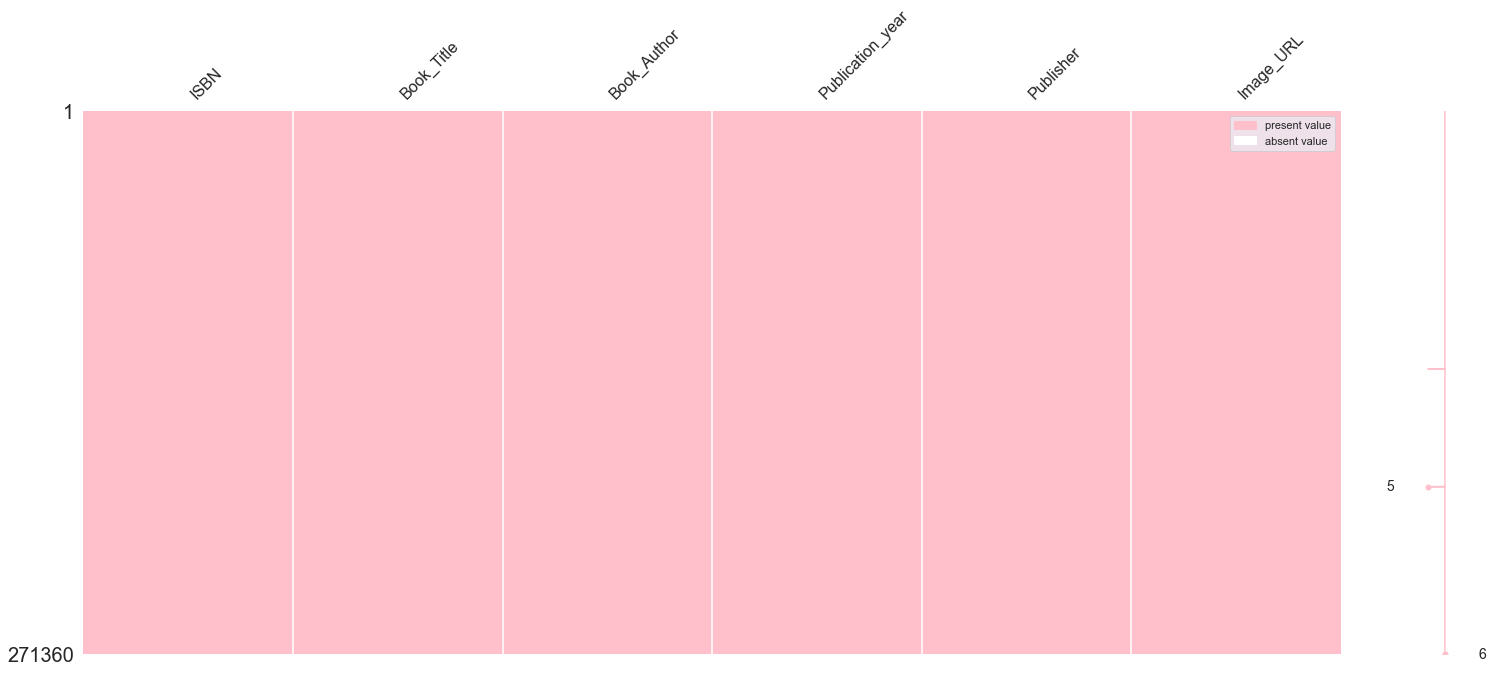

In [18]:
# display missing values in descending
print("Missing values in the book dataframe in descending: \n", missing_percentage(book).sort_values(by='Total', ascending=False))

# visualize where the missing values are located
msno.matrix(book, color=(255 / 255, 192 / 255, 203 / 255))
pink_patch = mpatches.Patch(color='pink', label='present value')
white_patch = mpatches.Patch(color='white', label='absent value')
plt.legend(handles=[pink_patch, white_patch])
plt.show()

### ------------> OBSERVATION
***
There are just 3 three null values I do not want to try to fill them, I will delete them instead since they cannot effect the dataset.

<a id="2.3.2"></a>
## 🔎 2.3.2 Impute missing values 
****

> **Sample user Dataset**

In [19]:
user['Age'].fillna(int(user['Age'].mean()), inplace=True)

<a id="2.3.3"></a>
## 🔎 2.3.3 Delete missing values 
****

In [20]:
book = book.dropna(axis = 0, how ='any')

<a id="2.4"></a>
# 💭 2.4 Upper Case the content
****

> **Sample Book Dataset**

In [21]:
# # Cast all values inside the dataframe (except the columns' name) into upper case.
book = book.applymap(lambda s: s.upper() if type(s) == str else s)
book.head(3)

,ISBN,Book_Title,Book_Author,Publication_year,Publisher,Image_URL
0,0195153448,CLASSICAL MYTHOLOGY,MARK P. O. MORFORD,2002,OXFORD UNIVERSITY PRESS,HTTP://IMAGES.AMAZON.COM/IMAGES/P/0195153448.0...
1,0002005018,CLARA CALLAN,RICHARD BRUCE WRIGHT,2001,HARPERFLAMINGO CANADA,HTTP://IMAGES.AMAZON.COM/IMAGES/P/0002005018.0...
2,0060973129,DECISION IN NORMANDY,CARLO D'ESTE,1991,HARPERPERENNIAL,HTTP://IMAGES.AMAZON.COM/IMAGES/P/0060973129.0...


> **Sample User Dataset**

In [22]:
# # Cast all values inside the dataframe (except the columns' name) into upper case.
user = user.applymap(lambda s: s.upper() if type(s) == str else s)
user.head(3)

,User_ID,Location,Age
0,1,"NYC, NEW YORK, USA",34.0
1,2,"STOCKTON, CALIFORNIA, USA",18.0
2,3,"MOSCOW, YUKON TERRITORY, RUSSIA",34.0


> **Sample Rating Dataset**

In [23]:
# # Cast all values inside the dataframe (except the columns' name) into upper case.
rating = rating.applymap(lambda s: s.upper() if type(s) == str else s)
rating.head(3)

,User_ID,ISBN,Book_Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


<a id="2.6"></a>
# 💭 2.6 Extra-whitespaces
****

In [24]:
def whitespace_remover(df):
    """
    The function will remove extra leading and trailing whitespace from the data.
    """
    # iterating over the columns
    for i in df.columns:
        # checking datatype of each columns
        if df[i].dtype == 'object' or df[i].dtype == 'str':
            # applying strip function on column
            df[i] = df[i].map(str.strip)
        else:
            # if condition is False then it will do nothing.
            pass

# remove all the extra whitespace
whitespace_remover(user)
whitespace_remover(rating)

<a id="2.7"></a>
# 💭 2.7 Split the location column
****

In [25]:
# #Expand columns:
user_location_expanded = user.Location.str.split(',', 2, expand=True)
user_location_expanded.columns = ['City', 'State', 'Country']
user = user.join(user_location_expanded)
#Drop column Location:
user.drop(columns=['Location', 'City', 'State'], inplace=True)
user = user.dropna(axis = 0, how ='any')

user.head()

,User_ID,Age,Country
0,1,34.0,USA
1,2,18.0,USA
2,3,34.0,RUSSIA
3,4,17.0,PORTUGAL
4,5,34.0,UNITED KINGDOM


## Recheck

In [26]:
categories = list(user['Country'].value_counts().index)

for x in range(len(categories)):
    print (categories[x])

 USA
 CANADA
 UNITED KINGDOM
 GERMANY
 SPAIN
 AUSTRALIA
 ITALY

 FRANCE
 PORTUGAL
 NEW ZEALAND
 NETHERLANDS
 SWITZERLAND
 BRAZIL
 CHINA
 SWEDEN
 INDIA
 AUSTRIA
 MALAYSIA
 ARGENTINA
 SINGAPORE
 FINLAND
 BELGIUM
 MEXICO
 DENMARK
 IRELAND
 PHILIPPINES
 TURKEY
 POLAND
 PAKISTAN
 GREECE
 IRAN
 ROMANIA
 CHILE
 ISRAEL
 SOUTH AFRICA
 INDONESIA
 NORWAY
 JAPAN
 CROATIA
 SOUTH KOREA
 SLOVAKIA
 NIGERIA
 CZECH REPUBLIC
 RUSSIA
 YUGOSLAVIA
 HONG KONG
 TAIWAN
 COSTA RICA
 ENGLAND, UNITED KINGDOM
 SLOVENIA
 PERU
 VIETNAM
 VENEZUELA
 EGYPT
 BULGARIA
 COLOMBIA
 SPAIN"
 LUXEMBOURG
 HUNGARY
 THAILAND
 GHANA
 PORTUGAL"
 SAUDI ARABIA
 ESPAÑA
 UNITED ARAB EMIRATES
 CALIFORNIA, USA
 BOSNIA AND HERZEGOVINA
 SRI LANKA
 DENMARK"
 ICELAND
 SWEDEN"
 PARAGUAY
 GUATEMALA
 BANGLADESH
 ANDORRA
 LITHUANIA
 UKRAINE
 LATVIA
 BOLIVIA
 BAHAMAS
 NEW YORK, USA
 TEXAS, USA
 JAMAICA
 ECUADOR
 BRITISH COLUMBIA, CANADA
 LEBANON
 PANAMA
 CUBA
 KUWAIT
 LA FRANCE
 MOROCCO
 MALTA
 FRANCE"
 SCOTLAND
 TRINIDAD AND TOBAGO
 ALBANIA
 L`I

### ------------> OBSERVATION
***
There are some of the error in the `Country` columns. I realise this column is the name of the columns so I want to use the library `dataprep` and use `validate_country()` function to check the country name.

In [27]:
error_country = user['Country'][~validate_country(user['Country'])]

print("The percent that countries have error: " +str(len(error_country)/ len(user) * 100))

The percent that countries have error: 2.8007286915110305


### ------------> OBSERVATION
***
Since the percentage is small so I want to drop them.

In [28]:
user.loc[user['Country'].isin(error_country), 'Country'] = 'NA'
user.drop(user[user['Country'].isin(['NA'])].index, inplace = True)


## Strip some of the extra whitespaces in `Country`

In [29]:
empty_string_country = user[user.Country == ''].Country.count()
nan_country = user.Country.isnull().sum()
print(f'There are {empty_string_country} entries with empty strings, and {nan_country} NaN entries in the Country field')
user.drop(user[user['Country'].isin([''])].index, inplace = True)

There are 0 entries with empty strings, and 0 NaN entries in the Country field


<a id="2.7"></a>
# ️🎧 2.7 Check the content:
****

> **Sample Book Dataset**

In [30]:
categories = list(book['Publication_year'].value_counts().index)

for x in range(len(categories)):
    print (categories[x])

2002
2001
1999
2000
1998
2003
1997
1996
1995
1994
1993
1992
1991
1990
1989
1988
1987
2004
1986
1999
1985
2000
2002
1998
2001
1984
0
1997
1996
1983
1995
1982
1994
2003
1993
1992
1991
1981
1990
1989
1988
1980
1987
1986
1979
1978
1985
1977
1984
2004
1983
1976
1982
0
1981
1975
1980
1974
1979
1973
1978
1972
1977
1976
1975
1971
1974
1970
1973
1969
1972
1971
1968
1970
1967
1966
1965
1964
1969
1963
1960
1961
1962
1959
1968
1958
1957
1965
1953
1954
1955
1960
1956
1961
1966
1962
1967
1964
1963
1951
1956
2005
1940
1959
1920
1955
1957
1950
1952
1958
2005
1953
1942
1930
1946
1952
1947
1911
1950
1911
1949
1951
1954
1940
1941
1923
1929
1901
1939
1938
1948
1943
1945
1920
1937
1936
2030
1947
1923
1944
1935
2030
1932
1948
2006
1942
1932
1933
1945
DK PUBLISHING INC
1941
1933
1939
1902
1925
2020
1928
1931
1922
2050
1949
1909
1900
1943
1921
1936
2010
1946
2020
2011
GALLIMARD
1378
1897
2024
1376
2008
1926
1919
1906
1938
2038
2011
1926
1904
1927
1914
1934
1910
1924
1900
2026
1930
1944
1917
1908
1806
2021
192

### ------------> OBSERVATION
***
There are some of the values that are not number, I want to have a detail look over it

In [31]:
new_df = book[book['Publication_year'].str.contains('\d', na=False)]
print(len(new_df)/ len(book) * 100)
new_df

24.150104843435034


,ISBN,Book_Title,Book_Author,Publication_year,Publisher,Image_URL
196608,0425176967,SELF-PORTRAIT WITH GHOSTS,KELLY DWYER,2000,BERKLEY PUBLISHING GROUP,HTTP://IMAGES.AMAZON.COM/IMAGES/P/0425176967.0...
196609,0373239971,BABY'S FIRST CHRISTMAS (THE BABY OF THE MONTH ...,MARIE FERRARELLA,1995,SILHOUETTE,HTTP://IMAGES.AMAZON.COM/IMAGES/P/0373239971.0...
196610,0373201613,MAN SHE MARRIED (BY REQUEST) (BY REQUEST),ANN MAJOR,1999,HARLEQUIN,HTTP://IMAGES.AMAZON.COM/IMAGES/P/0373201613.0...
196611,159071024X,THE GILDED CHAMBER,REBECCA KOHN,2004,RUGGED LAND,HTTP://IMAGES.AMAZON.COM/IMAGES/P/159071024X.0...
196612,0066210747,THE BIELSKI BROTHERS: THE TRUE STORY OF THREE ...,PETER DUFFY,2003,HARPERCOLLINS,HTTP://IMAGES.AMAZON.COM/IMAGES/P/0066210747.0...
...,...,...,...,...,...,...
262139,0897332032,"THE AGE OF AGONY: THE ART OF HEALING, 1700-1800",GUY R. WILLIAMS,1986,ACADEMY CHICAGO PUBLISHERS,HTTP://IMAGES.AMAZON.COM/IMAGES/P/0897332032.0...
262140,0897332857,THE AGE OF MIRACLES,GUY WILLIAMS,1987,ACADEMY CHICAGO PUBLISHERS,HTTP://IMAGES.AMAZON.COM/IMAGES/P/0897332857.0...
262141,0897333918,THE COMMON STREAM: TWO THOUSAND YEARS OF THE E...,ROWLAND PARKER,1994,ACADEMY CHICAGO PUBLISHERS,HTTP://IMAGES.AMAZON.COM/IMAGES/P/0897333918.0...
262142,0906540631,THE ESSENE ODYSSEY: THE MYSTERY OF THE TRUE TE...,HUGH J. SCHONFIELD,1993,ELEMENT BOOKS,HTTP://IMAGES.AMAZON.COM/IMAGES/P/0906540631.0...


In [32]:
# Convert years to float
book.Publication_year = pd.to_numeric(book.Publication_year, errors='coerce')
# Check for 0's or NaNs in Year of Publication
zero_yr = book[book.Publication_year == 0].Publication_year.count()
nan_yr = book.Publication_year.isnull().sum()
print(f'There are {zero_yr} entries as \'0\', and {nan_yr} NaN entries in the Year of Publication field')

# Drop all values in Publication_year which is lower than 5
book.drop(book[(book["Publication_year"] < 5)].index, inplace = True)
book = book.dropna(axis = 0, how ='any')

There are 4618 entries as '0', and 3 NaN entries in the Year of Publication field


### ------------> OBSERVATION
***
As we can see, most of the the values in the `Publication_year` is not correct. So I want to deal with it

> **Sample Rating Dataset**

In [33]:
categories = list(rating['Book_Rating'].value_counts().index)

for x in range(len(categories)):
    print (categories[x])

0
8
10
7
9
5
6
4
3
2
1


<a id="2.8"></a>
# ️🎧 2.8 Change data type:
****

> **Sample Book Dataset**

In [34]:
book['Publication_year'].value_counts()

2002.0    17626
1999.0    17431
2001.0    17358
2000.0    17232
1998.0    15766
1997.0    14890
2003.0    14358
1996.0    14030
1995.0    13545
1994.0    11796
1993.0    10602
1992.0     9906
1991.0     9389
1990.0     8660
1989.0     7936
1988.0     7492
1987.0     6529
1986.0     5841
2004.0     5839
1985.0     5343
1984.0     4986
1983.0     4499
1982.0     4197
1981.0     3279
1980.0     2676
1979.0     2208
1978.0     2131
1977.0     1897
1976.0     1597
1975.0     1219
1974.0     1023
1973.0      923
1972.0      772
1971.0      540
1970.0      459
1969.0      339
1968.0      233
1966.0      183
1967.0      176
1965.0      173
1964.0      149
1960.0      133
1961.0      132
1963.0      132
1962.0      123
1959.0      103
1958.0       77
1957.0       76
1956.0       74
1955.0       70
1953.0       63
1954.0       54
2005.0       46
1951.0       40
1940.0       36
1952.0       34
1920.0       33
1950.0       32
1911.0       19
1942.0       14
1947.0       14
1930.0       13
1946.0  

In [35]:
book['ISBN'] = book['ISBN'].astype('string')
book['Book_Title'] = book['Book_Title'].astype('string')
book['Book_Author'] = book['Book_Author'].astype('string')
book['Publisher'] = book['Publisher'].astype('string')
book['Image_URL'] = book['Image_URL'].astype('string')
book['Publication_year'] = book['Publication_year'].astype('int')

> **Sample User Dataset**

In [36]:
user['User_ID'] = user['User_ID'].astype('int')
user['Country'] = user['Country'].astype('string')
user['Age'] = user['Age'].astype('int')


> **Sample Rating Dataset**

In [37]:
rating['User_ID'] = rating['User_ID'].astype('int')
rating['ISBN'] = rating['ISBN'].astype('string')
rating['Book_Rating'] = rating['Book_Rating'].astype('int')


<a id="2.9"></a>
# 📊 2.9 Descriptive statistics for Central Tendency

> **Sample Book Dataset**

In [38]:
# see the static of all numerical column
book.describe().T

,count,mean,std,min,25%,50%,75%,max
Publication_year,266736.0,1993.689708,8.32583,1376.0,1989.0,1996.0,2000.0,2050.0


> **Sample User Dataset**

In [39]:
# see the static of all numerical column
user.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,271046.0,139410.148145,80480.860780,1.0,69700.25,139362.5,209106.75,278858.0
Age,271046.0,34.448190,11.213875,0.0,29.00,34.0,35.00,244.0


<AxesSubplot:>

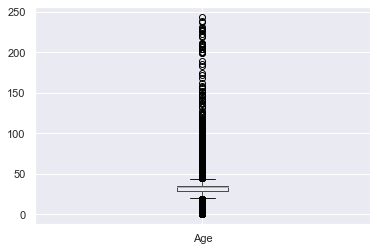

In [40]:
user.boxplot('Age')

### ------------> OBSERVATION
***
As we can see, there are some 0 values for age columns. It's not true for an infant who are 0 year old to read book!! Moreover, are also some values that users are over 100 years old. So I would like to see those impossible values.

> - The user who are 0 year old are impossible so I would like to drop
> - From my personal point of view, the recommender system should better concentrates on the people who are from 5 to 90 years old, since this is the normal range for age.


In [41]:
df_filtered = user[(user["Age"] < 5)|(user["Age"] >= 90)]
print(len(df_filtered)/ len(user) * 100)
df_filtered

0.468924094065214


,User_ID,Age,Country
219,220,0,COLOMBIA
469,470,0,USA
561,562,0,ALBANIA
612,613,1,TURKEY
670,671,1,SAUDI ARABIA
...,...,...,...
277107,277108,104,SWITZERLAND
277503,277504,103,USA
277558,277559,98,USA
277908,277909,2,USA


### ------------> OBSERVATION
***
These values just accounts for just a small amount of number. Moreover, the age of people who are out of the normal range I would like to drop these column.

In [42]:
user.drop(user[(user["Age"] < 5)|(user["Age"] >= 90)].index, inplace = True)

> **Sample Rating Dataset**

In [43]:
# see the static of all numerical column
rating.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,1149780.0,140386.395126,80562.277718,2.0,70345.0,141010.0,211028.0,278854.0
Book_Rating,1149780.0,2.866950,3.854184,0.0,0.0,0.0,7.0,10.0


<AxesSubplot:>

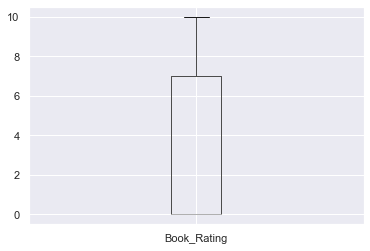

In [44]:
rating.boxplot('Book_Rating')

<a id="2.10"></a>
## 📌 2.10 Age Range
***
> - In the recommendation system, one of the most considerable factor for generating a valuable recommendation is the age. Some of the book that is not for the child who are under 18 should not be recommended to the children. Since then, I want to create a new column which is `Age_Range`.
> - Secondly, the `Age` Column is the ordinal so this column is appropriate to do that.

In [45]:
# create a list of my conditions
conditions = [
    (user['Age'] < 18),
    (user['Age'] >= 18) & (user['Age'] <= 36),
    (user['Age'] > 36) & (user['Age'] <= 40),
    (user['Age'] > 40) & (user['Age'] <= 60),
    (user['Age'] > 60) & (user['Age'] < 90),
    ]

# create a list of the values we want to assign for each condition
values = ['Under 18', '18-36', '36-40', '40-60', '60-90']

# create a new column and use np.select to assign values to it using our lists as arguments
user['Age_Range'] = np.select(conditions, values)

# display updated DataFrame
user.head()

,User_ID,Age,Country,Age_Range
0,1,34,USA,18-36
1,2,18,USA,18-36
2,3,34,RUSSIA,18-36
3,4,17,PORTUGAL,Under 18
4,5,34,UNITED KINGDOM,18-36


<a id="2.11"></a>
# 🗞 2.11 Merge column
***
I want to have a deeper look in the EDA step so I want to merge some the pair dataframe together.
> - First, I'll join the `book` dataframe with the `rating` dataframe on the ISBN field.

## 🗞 2.11.1 Merge book and rating

In [63]:
print(f'Book dataframe size: {len(book)}')
print(f'Rating dataframe size: {len(rating)}')
book_with_rating = rating.join(book.set_index('ISBN'), on='ISBN')
print(f'New dataframe size: {len(book_with_rating)}')

Book dataframe size: 266736
Rating dataframe size: 1149780
New dataframe size: 1163466


## 🗞 2.11.1 Merge book and rating

## 🗞 2.11.1 Merge book and rating

<a id="2.12"></a>
# 📂 2.12 Save the Intermediate data
***
After the cleaning step, all data is saved to a csv file for visualisation step later.

In [46]:
user.to_csv("Data/user_cleaned.csv", encoding='utf-8')
book.to_csv("Data/book_cleaned.csv", encoding='utf-8')
rating.to_csv("Data/rating_cleaned.csv", encoding='utf-8')

<a id="3"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 📊 3. Data exploration (EDA)</strong></h1>

## Function for box plot visualization

In [47]:
PROPS = {
    'boxprops':{'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}
def plot_box(dataset, x, y, xlabel, ylabel, title, subtitle, color, title_position, subtitle_position, order=None):
    ax = sns.boxplot(data = dataset, y = y, x = x, order = order,
                 linewidth = 1.2, color = color, **PROPS,
                 flierprops = dict(marker = 'o', markeredgecolor = 'black', markersize = 6.5, linestyle = 'none', markerfacecolor = color, alpha = 0.9))

    plt.xlabel(xlabel, fontweight = 'bold', fontsize = 16)
    plt.ylabel(ylabel, fontweight = 'bold', fontsize = 16)
    ax.tick_params(labelsize = 14)
    ax.text(x = title_position, y = 1.07, s = title, fontsize = 22.5, weight = 'bold', ha = 'center', va = 'bottom', transform = ax.transAxes)
    ax.text(x = subtitle_position, y = 1.03, s = subtitle, fontsize = 16.5, alpha = 0.75, ha = 'center', va = 'bottom', transform = ax.transAxes)
    plt.show()

<a id="3.1"></a>
# 3.1 Distribution of Rating
******

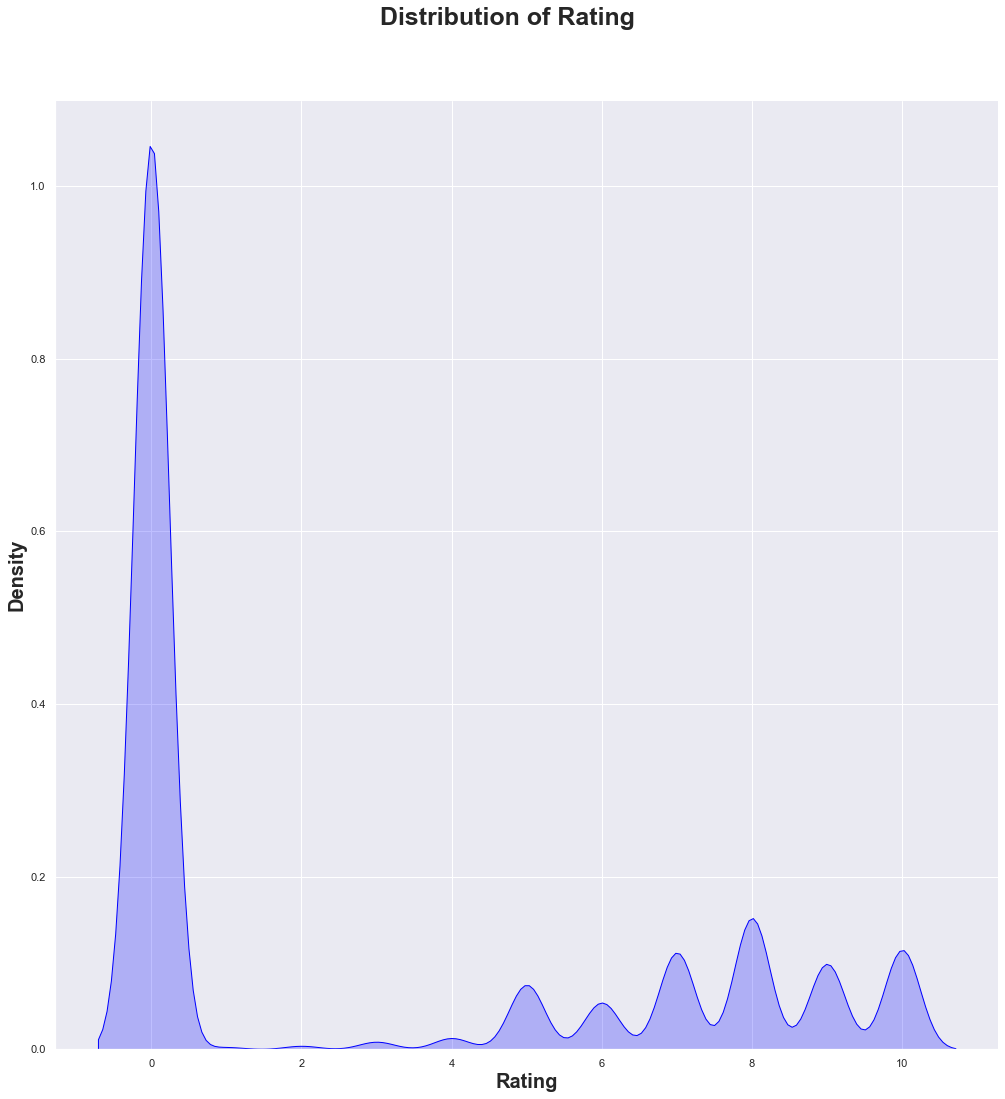

In [48]:
# sns.displot(train, x="Survived", hue="Pclass", kind="kde", fill=True)
plot = sns.displot(rating, x="Book_Rating", kind="kde", fill=True, color='blue', height= 14)

plot.fig.suptitle("Distribution of Rating", fontsize=25, y=1.08, fontweight = 'bold')
plot.set_xlabels("Rating", fontsize = 20, fontweight = 'bold' )
plot.set_ylabels("Density", fontsize = 20, fontweight = 'bold')

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">OBSERVATION:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>Suprisingly, most of books are rated at <span style="color:#122ecc;">more 0 point</span>  , the number of book get <span style="color:#122ecc;">10/10 is also relatively lower than, </span> nevertheless, it is <span style="color:#122ecc;"> higher than the 5/10 rating point</span>.</li>
</ul>
</div>

<a id="3.3"></a>
# 3.3 How old are the users?
******

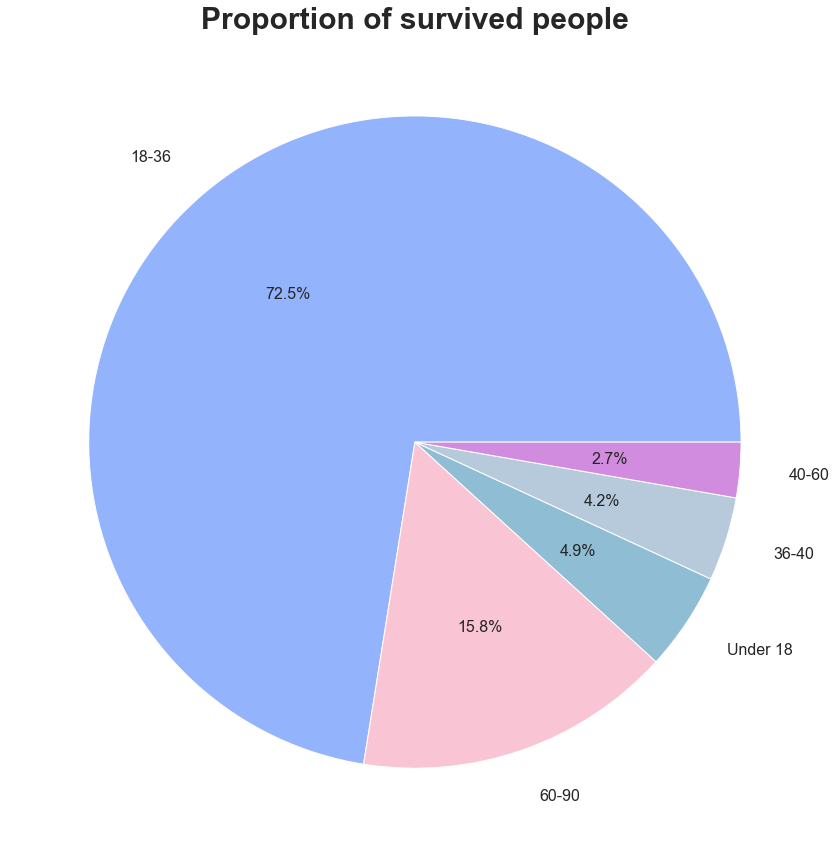

In [49]:
plt.rcParams['figure.figsize'] = [20, 15]
# Pie chart
labels = ['18-36', '60-90', 'Under 18', '36-40', '40-60']
#colors
colors = ['#94B3FD', '#F9C5D5', '#8FBDD3' ,'#B7CADB', '#D18CE0']
ax = plt.pie(user['Age_Range'].value_counts(), labels=labels, labeldistance=1.15, colors=colors, autopct='%1.1f%%', textprops={'fontsize': 16});
plt.title('Proportion of survived people', fontsize=30, fontweight = 'bold')
plt.show()


<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">OBSERVATION:</li>
</ul>
<div class="alert alert-info" role="alert">
<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>Suprisingly, most of users are at <span style="color:#122ecc;">18-36 years old</span> 
        with over 72 percent </li>
    <li>In the second place, there are over  <span style="color:#122ecc;">15 percent</span> of the readers are at
         <span style="color:#122ecc;">60-90 years old</span>.</li>
    <li>The readers who are <span style="color:#122ecc;">under 18 is under 5 percent</span>. This group is one of the most considerable group since the content of book must be appropriate for them, but they are just a minor factor in our recommender system</li>
    <li>Both of the group <span style="color:#122ecc;">36-40 and 40-60</span> year-old reader still under 7 percent
    </li>
    <li>Hence, in this book recommender system we should concentrate on the group <span style="color:#122ecc;">18-36 and 60-90</span> year-old readers
    </li>
</ul>
</div>

<a id="3.3"></a>
# 3.3 The 10 country having the highest amount of users:
******

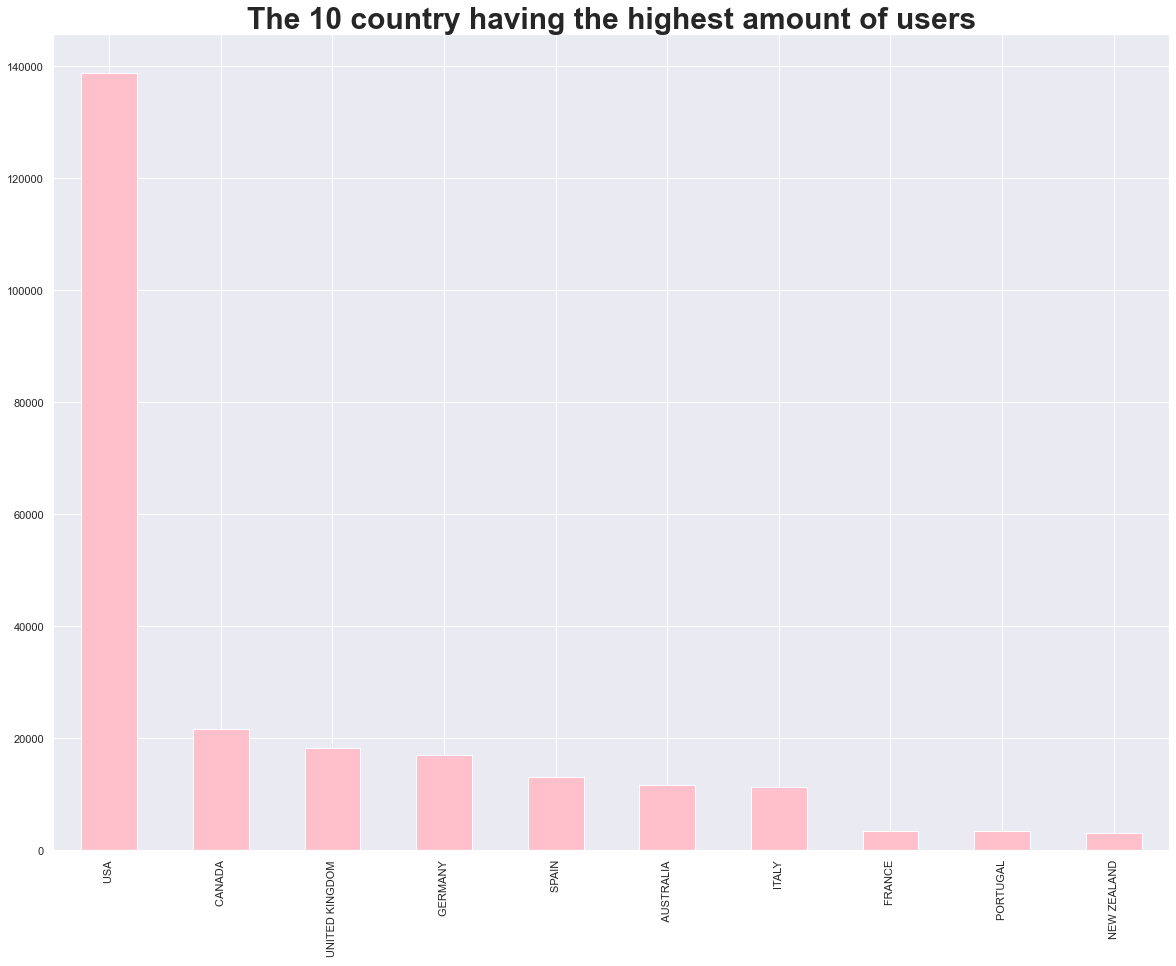

In [50]:
user['Country'].value_counts()[:10].plot(kind='bar', color='pink')
plt.title('The 10 country having the highest amount of users', fontsize=30, fontweight = 'bold')
plt.show()

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">OBSERVATION:</li>
</ul>
<div class="alert alert-info" role="alert">
<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>Top 10 countries having the highest readers which are <span style="color:#122ecc;">USA, CANADA, UNITED KINGDOM, GERMANY, SPAIN, AUSTRALIA, ITALY, FRANCE, PORTUGAL, NEW ZEALAND</span> </li>
    <li> <span style="color:#122ecc;">USA</span> has the highest users and the number of user is higher than 7 times compare to other countries </li>
</ul>
</div>

<a id="3.3"></a>
# 3.3 When did these books were published:
******

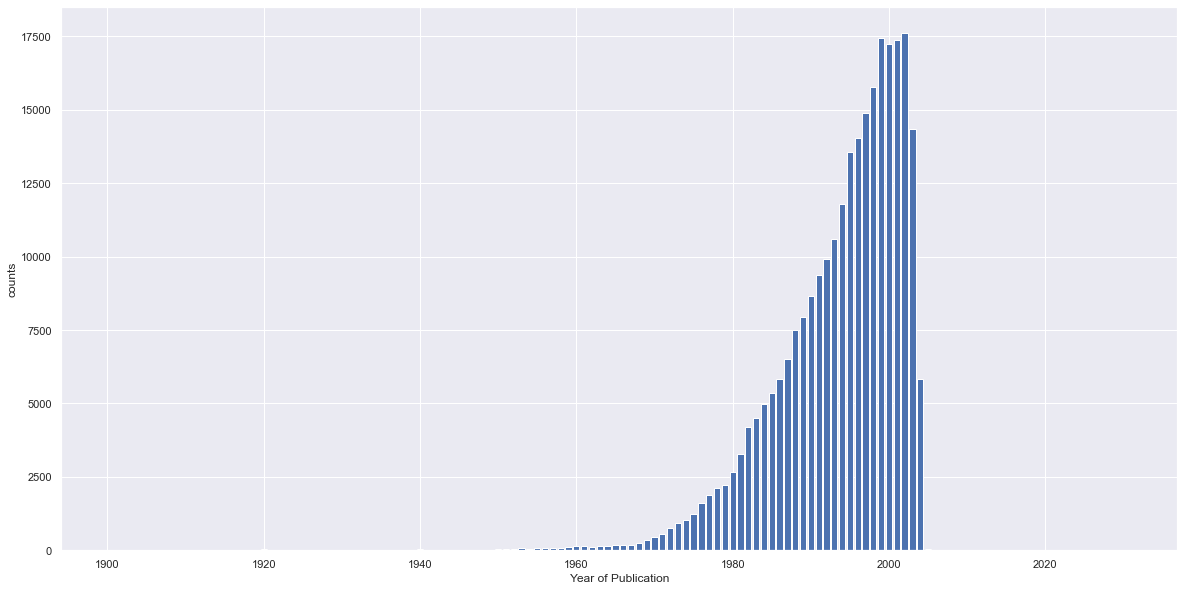

In [51]:
yr = book.Publication_year.value_counts().sort_index()
# I just want to fill the book that have occured 5 times
yr = yr.where(yr>5)
plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 15}) # Set larger plot font size
plt.bar(yr.index, yr.values)
plt.xlabel('Year of Publication')
plt.ylabel('counts')
plt.show()

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">OBSERVATION:</li>
</ul>
<div class="alert alert-info" role="alert">
<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>Most of the book have been released in  <span style="color:#122ecc;">2000s</span> </li>
</ul>
</div>



In [55]:
users_interactions_count_df = rating.groupby(['User_ID', 'ISBN']).size().groupby('User_ID').size()
print('# users: %d' % len(users_interactions_count_df))
users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 5].reset_index()[['User_ID']]
print('# users with at least 5 interactions: %d' % len(users_with_enough_interactions_df))

# users: 105283
# users with at least 5 interactions: 22816


<a id="3.4"></a>

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=14dpaeXX-ajsM8quwe3dCCdQdrdvf29iI" align="left" hspace="20px" vspace="20px" width="45" height="60" ></p>
<br>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Yu Mincho Demibold;font-size:40px;font-style: italic;color:  #6468e8">3.4 Summary</li>
</ul>
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">
    <br>
    
*******
    
<li>1. Suprisingly, <span style="color:#122ecc;">more</span> people <span style="color:#122ecc;">don't have Sepsis</span>.</li>
<br>
<li>2. In the <span style="color:#122ecc;">the 30s or older</span>, people have higher probability to have Sepsis</li>
<br>
<li>3. The higher the body mass index is the higher chance that pantient can get Sepsis. The average of body mass index that people having Sepsis is <span style="color:#122ecc;">over 35kg/m^2.</span> </li>
<br>
<li>4. The higher the PL is the higher chance that pantient can get Sepsis. The average of PL (Blood Work Result-1 (mu U/ml)) that people having Sepsis is <span style="color:#122ecc;">higher than 140</span> while people not have Sepsis have the average PL is around 100</li>
<br>
<li>5. The higher the PR is the higher chance that pantient can get Sepsis. The level of PR ((Blood Pressure (mm Hg) that people having Sepsis likely to have is <span style="color:#122ecc;">higher than 80</span> </li>
<br>
<li>6. The higher the SK is the higher chance that pantient can get Sepsis. The average of SK (Blood Work Result-2 (mm)) that people having Sepsis is <span style="color:#122ecc;">higher than 30</span> while people not have Sepsis have the average SK is around 20 </li>
<br>
<li>7. The higher the TS is the higher chance that pantient can get Sepsis. The average of TS (Blood Work Result-3 (mu U/ml)) that people having Sepsis is <span style="color:#122ecc;">higher than 110</span> while people not have Sepsis have the average TS is lower than 70 </li>
<br>
<li>8. The higher the TS is the higher chance that pantient can get Sepsis. The level of BD2 (Blood Work Result-4 (mu U/ml)) that people having Sepsis likely to have is <span style="color:#122ecc;">higher than 0.5 </span> </li>
    
</ul>

<a id="4"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 🛠 4. Feature Engineering</strong></h1>


<p style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black"> 
    In feature engineering, there are 3 main step which are class balancing, split data, and feature scaling.
</p>

<a id="5"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 🤖 5. Build a Recommender System</strong></h1>

*****